# Red Wine Quality

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).


In [503]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [504]:
df= pd.read_csv("Red_Wine_Quality")

# EXAMINE THE DATA

import the data and now I will use .head and .info methods to learn more about dataset.

In [505]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


As we can see in this dataset there are 1599 rows and 12 columns.

In [506]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [507]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Dataset Information 1599 rows x 12 columns with no null values.

All 11 features and 1 column for specifying Wine-Quality.

We can see that the all data is in float format and Qulaity is in integer. All the data is numeric.

In [509]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Attribute Information:



#### Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

#### Output variable (based on sensory data):

12 - quality (score between 0 and 10)

# CHECKING MISSING VALUES

In [510]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

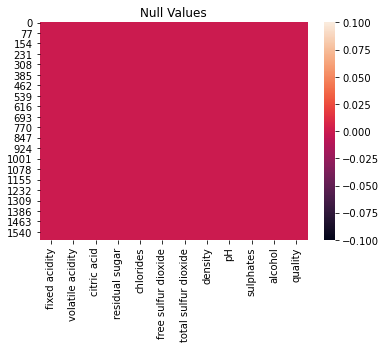

In [511]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

As we can see in our heatmap there is no missing value in this dataset.



# DESCRIBING DATASET

In [512]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The measures of central tendency and variability or distribution are some commonly used measures to define the data set. The measures used to define the central tendency are mean, median and mode. The standard deviations (or variance) are the minimum and maximum values of variables. The table above is a summary of some statistical measures for each numeric predictor of the dataset:

count indicates the number of records for each attribute that corresponds to the number of wines.

mean indicates the average value around which each group of attributes is attested.

std indicates the standard deviation of each attribute group, from which we can guess the degree of data dispersion around the average.

max and min indicate the attribute that I assume the highest and lowest value for each attribute group.

# Exploratory Data Analysis (EDA)

#### Univariate Analysis

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

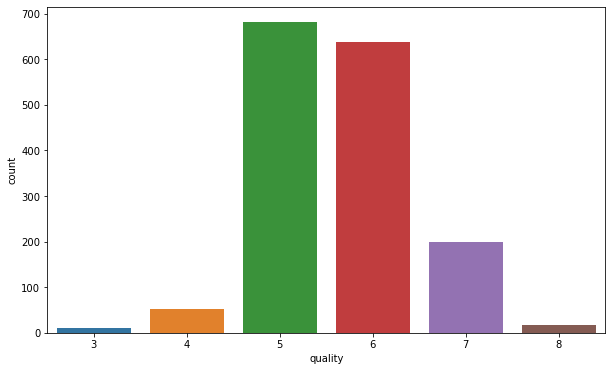

In [513]:
plt.figure(figsize=(10, 6))
sns.countplot(df["quality"],data=df)
df["quality"].value_counts()

we can see that most of wines are under quality 5 & 6.

### Bivariate Analysis


##### Target variable is Quality. So will plot a barplot each column against target variable


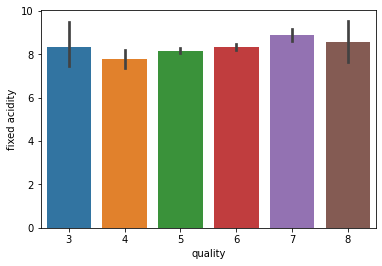

In [514]:
sns.barplot(x='quality', y='fixed acidity', data = df)

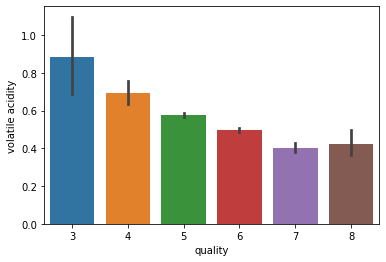

In [515]:
sns.barplot(x="quality", y="volatile acidity", data=df)

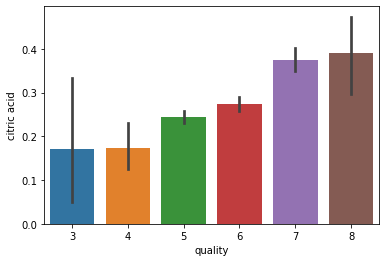

In [516]:
sns.barplot(x="quality", y="citric acid", data=df)

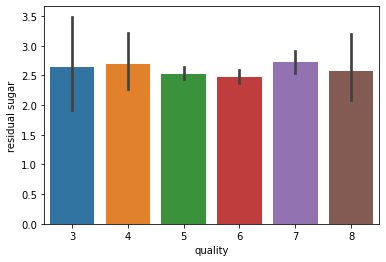

In [517]:
sns.barplot(x="quality", y= "residual sugar", data=df)

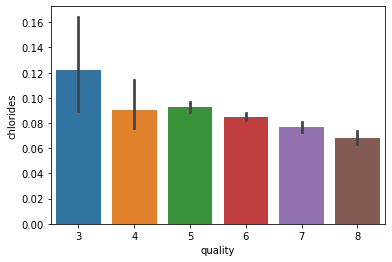

In [518]:
sns.barplot(x="quality",y= "chlorides", data=df)

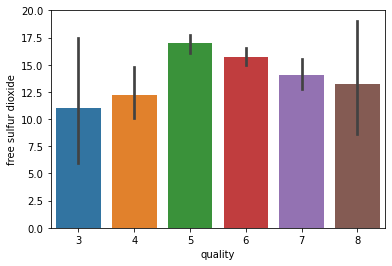

In [519]:
sns.barplot(x="quality", y="free sulfur dioxide", data=df)

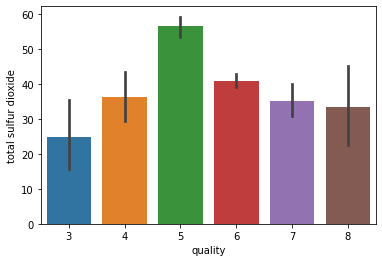

In [521]:
sns.barplot(x="quality", y="total sulfur dioxide", data=df)

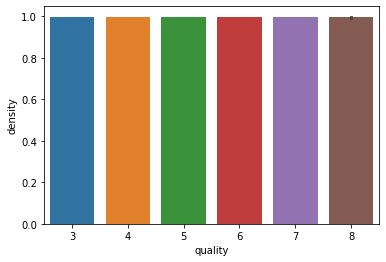

In [522]:
sns.barplot(x="quality",y= "density", data=df)

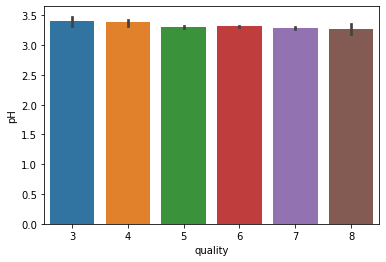

In [523]:
sns.barplot(x="quality", y="pH", data=df)

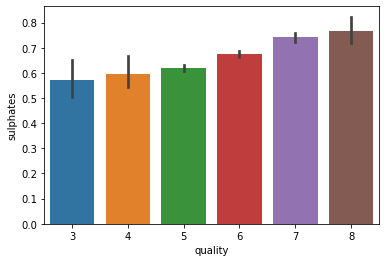

In [524]:
sns.barplot(x="quality", y="sulphates", data=df)

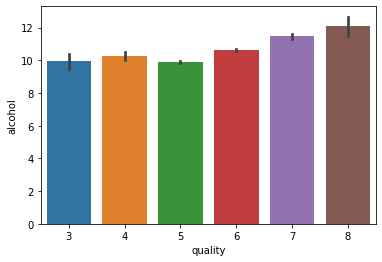

In [525]:
sns.barplot(x="quality", y="alcohol", data=df)

# FINDING CORRELATION

### Multivariate Analysis

In [440]:
corr= df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


#### Finding correlation of Quality(target variable) with other attributes through heatmap.

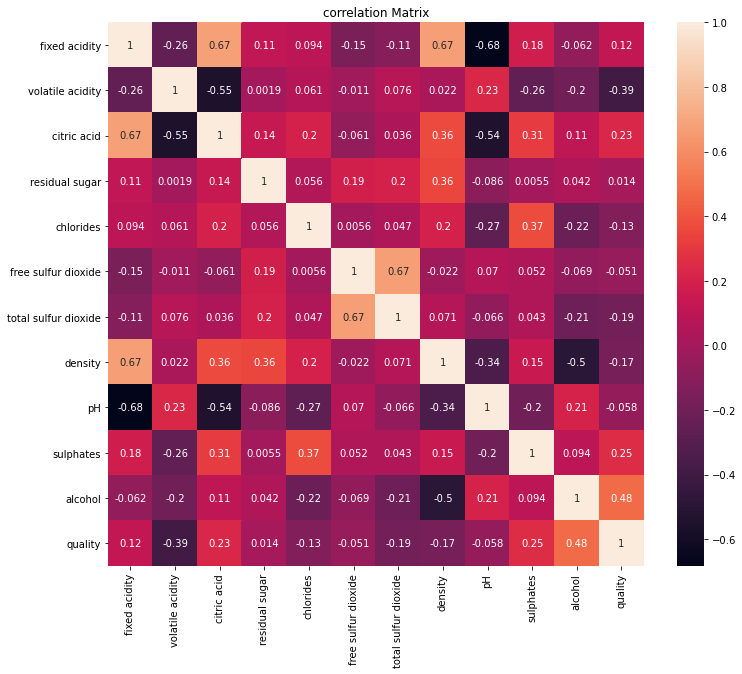

In [441]:
corr_mat=df.corr()   

plt.figure(figsize=[12,10])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show()

This data set has many different features and it is important to understand relationship between these in order to analyze dataset better. For that reason, correlation map helps to understand these relations in a single representation. Correlation map is made by calculating the covariance of each features with respect to others, then each covariance value is divided by standard deviation of each variables and get results between -1, 0, 1.

-1 means: There is a negative relationship between dependent and independent variables .

0 means: There is no relationship between dependent and independent variables .

1 means: There is a positive relationship between dependent and independent variables . According to these information, it can be made a good analyze about dataset and columns.

In [442]:
corr_matrix=df.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

According to figure in above;

Quality has a (+)positive relationship between alcohol, sulphates, citric acid.

Quality has a (-)negative weak relationship between volitile_acidicity, total sulfur dioxide, density.

Quality has almost no relationship between residual_sugar, free_sulfur_dioxide, and pH.(corr =~ 0)



# Set up model matrix

now we will convert our quality of wine in review column.

for qulaity 3,4 = inferior

for quality 5,6 = fine

for quality 7,8 = superior

In [444]:
reviews = []
for i in df['quality']:
    if i >= 1 and i <= 4:
        reviews.append('inferior')
    elif i >= 5 and i <= 6:
        reviews.append('fine')
    elif i >= 7 and i <= 8:
        reviews.append('superior')
df['reviews'] = reviews

In [445]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'reviews'],
      dtype='object')

In [446]:
df['reviews'].unique()

array(['fine', 'superior', 'inferior'], dtype=object)

fine        1319
superior     217
inferior      63
Name: reviews, dtype: int64

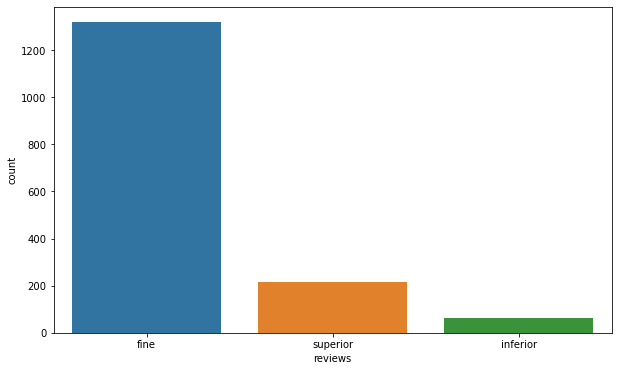

In [447]:
plt.figure(figsize=(10, 6))
sns.countplot(df["reviews"],data=df)
df["reviews"].value_counts()

In [448]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["reviews"] = le.fit_transform(df["reviews"])

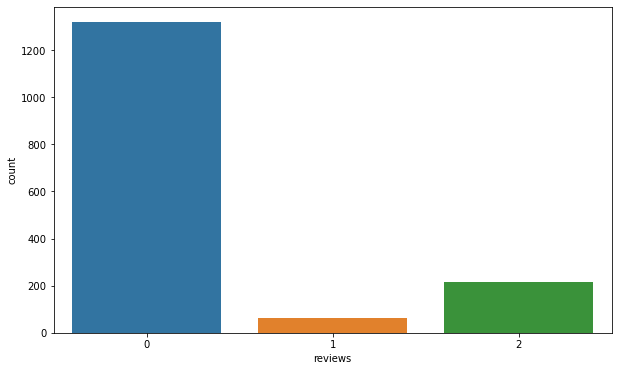

In [449]:
plt.figure(figsize=(10, 6))
sns.countplot(df["reviews"])

In [450]:
df['reviews']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: reviews, Length: 1599, dtype: int32

#### now we dont need "qulaity" because now our target varibale is "reviews". we will drop "quality" variable.

In [451]:
df.drop(columns="quality", axis=1, inplace=True)

In [452]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'reviews'],
      dtype='object')

# Splitting the data into X & Y

In [453]:
x= df.drop("reviews",axis=1)
y= df["reviews"]

In [454]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [455]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [456]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: reviews, Length: 1599, dtype: int32

In [457]:
y.unique()

array([0, 2, 1])

# scaling 

In [458]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

x=pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [459]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923


Now every column value is between 0 & 1. We can compare the data more accurately.

# Checking Skweness

In [460]:
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

we can see there is skewness in each column as value is greater than 0.5 & -0.5

#### checking skewness through distplot

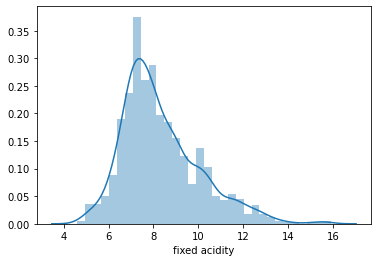

In [461]:
sns.distplot(df["fixed acidity"])

It shows the graph is right skewed.

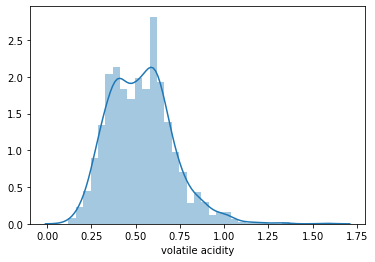

In [462]:
sns.distplot(df["volatile acidity"])

It shows the graph is right skewed.

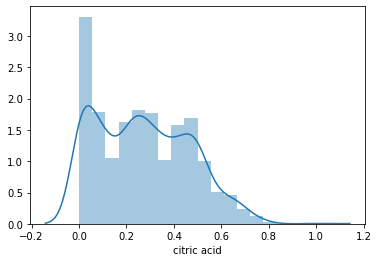

In [463]:
sns.distplot(df["citric acid"])

It shows the graph is little bit right skewed.

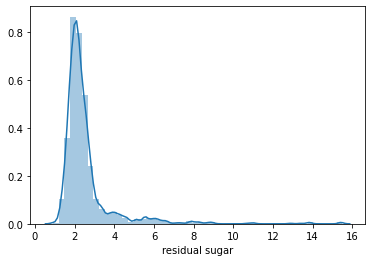

In [464]:
sns.distplot(df["residual sugar"])

It shows the graph is right skewed.

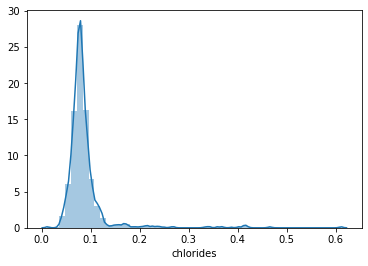

In [465]:
sns.distplot(df["chlorides"])

It shows the graph is right skewed.

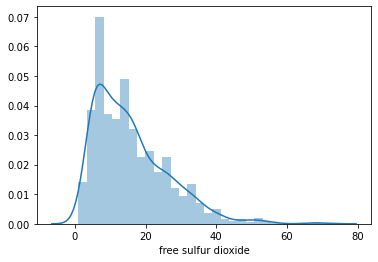

In [466]:
sns.distplot(df["free sulfur dioxide"])

It shows the graph is right skewed.

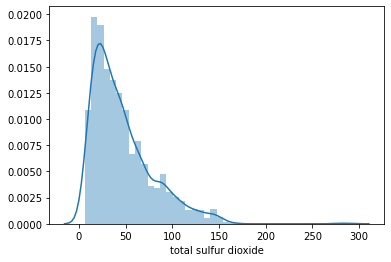

In [467]:
sns.distplot(df["total sulfur dioxide"])

It shows the graph is right skewed.

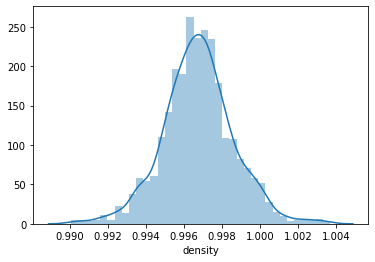

In [468]:
sns.distplot(df["density"])

density curve shows normal distribution.

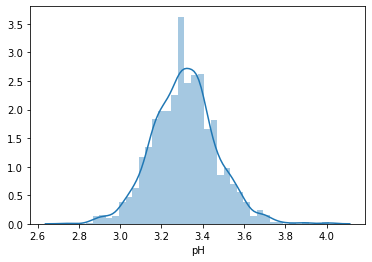

In [469]:
sns.distplot(df["pH"])

pH curve is also a normal distribution.

No skewness.

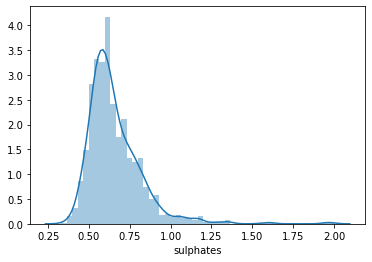

In [470]:
sns.distplot(df["sulphates"])

It shows the graph is right skewed.

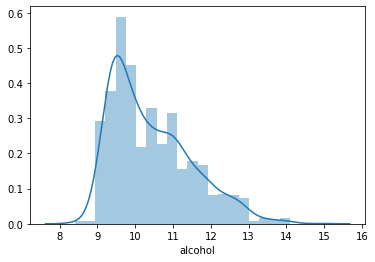

In [471]:
sns.distplot(df["alcohol"])

It shows the graph is right skewed.

Attributes whose value is greater than +0.5 or -0.5, there is skewness. we need to remove them through power_transfor

# Removing skewness

In [472]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [473]:
df_new.skew()

fixed acidity           0.012001
volatile acidity        0.004117
citric acid             0.017788
residual sugar          0.201007
chlorides              -0.189673
free sulfur dioxide     0.126823
total sulfur dioxide    0.174068
density                 0.025968
pH                      0.008541
sulphates               0.015969
alcohol                 0.101800
dtype: float64

Now we can see that there is no skewed values(>0.5)

# Checking outliers

<function matplotlib.pyplot.show(*args, **kw)>

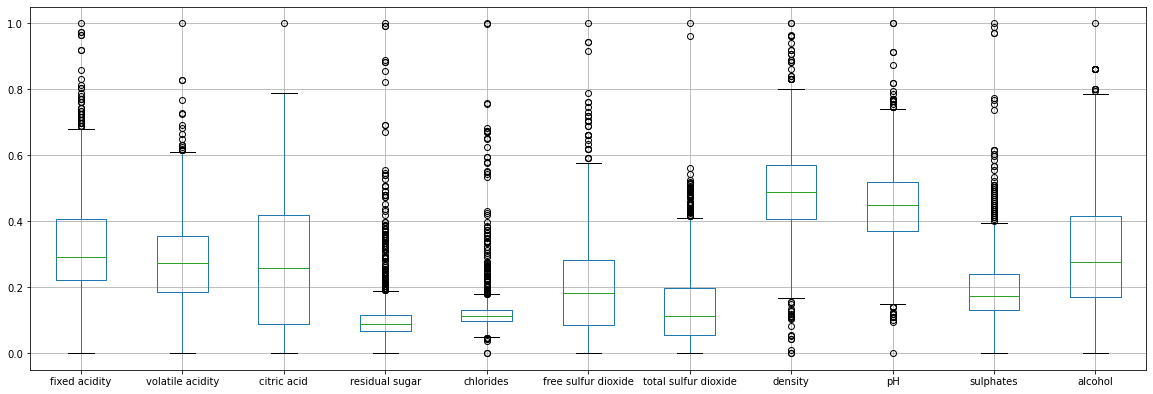

In [474]:
x.iloc[:,0:12].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show

we can se lot of outliers but we will not remove them otherwise we will loose our important data. 

# FINDING BEST RANDOM STATE

In [475]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0

for i in range (1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30, random_state=i)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state", maxRS)

Best accuracy is 0.875 on Random_state 6


# CREATING TRAIN TEST SPLIT

## LogisticRegression

In [476]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression(random_state=6)
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.84375
[[393   0   9]
 [ 22   0   0]
 [ 44   0  12]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       402
           1       0.00      0.00      0.00        22
           2       0.57      0.21      0.31        56

    accuracy                           0.84       480
   macro avg       0.48      0.40      0.41       480
weighted avg       0.78      0.84      0.80       480



## DecisionTreeClassifier

In [477]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(random_state=6)
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


0.8208333333333333
[[358  21  23]
 [ 14   5   3]
 [ 24   1  31]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       402
           1       0.19      0.23      0.20        22
           2       0.54      0.55      0.55        56

    accuracy                           0.82       480
   macro avg       0.54      0.56      0.55       480
weighted avg       0.83      0.82      0.82       480



## Support Vector Classifier

In [478]:
from sklearn.svm import SVC

svc= SVC(random_state=23)
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.85
[[393   0   9]
 [ 21   0   1]
 [ 41   0  15]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       402
           1       0.00      0.00      0.00        22
           2       0.60      0.27      0.37        56

    accuracy                           0.85       480
   macro avg       0.49      0.42      0.43       480
weighted avg       0.79      0.85      0.81       480



## RandomForestClassifier

In [479]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(random_state=6)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


0.875
[[391   0  11]
 [ 21   0   1]
 [ 27   0  29]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       402
           1       0.00      0.00      0.00        22
           2       0.71      0.52      0.60        56

    accuracy                           0.88       480
   macro avg       0.53      0.50      0.51       480
weighted avg       0.83      0.88      0.85       480



we are getting higest accuracy with RandomForestClassifier but it can be due to overfitting also, so we will check cross validation scores.

# cross_val_score

In [480]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("cross validation score of LogisticRegression model:", scr.mean())

cross validation score of LogisticRegression model: 0.825525078369906


In [481]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf,x,y,cv=5)
print("cross validation score of RandomForestClassifier model:", scr.mean())

cross validation score of RandomForestClassifier model: 0.824277037617555


In [482]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(svc,x,y,cv=5)
print("cross validation score of SVC model:", scr.mean())

cross validation score of SVC model: 0.8230172413793102


In [483]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtc,x,y,cv=5)
print("cross validation score of DecisionTreeClassifier model:", scr.mean())

cross validation score of DecisionTreeClassifier model: 0.7260717084639499


The minimum difference between accuracy_score & cross_val_score is with Support Vector Classifier algorithm.
so, this SVC our best algorithm.

# Hyperparameter tunning with best model

In [409]:
# importing GridSearchCV

from sklearn.model_selection import GridSearchCV

In [490]:
from sklearn import svm, datasets

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

svc = svm.SVC()
GCV=GridSearchCV(svc, parameters, cv=5)
GCV.fit(x_train, y_train)
GCV.best_params_

{'C': 1, 'kernel': 'rbf'}

In [491]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [492]:
accuracy_score(y_test,GCV_pred)

0.85

we are getting 85% accuarcy with SVC algorith.

# Model Saving

In [529]:
import joblib
joblib.dump(GCV.best_estimator_,"Red_Wine_Quality_SVC.pkl")

['Red_Wine_Quality_SVC.pkl']